<a href="https://colab.research.google.com/github/Zinwaiyan274/Ukraine-Russia-War-Twitter-Sentiment-Analysis/blob/main/Ukraine_Russia_War_Twitter_Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import nltk
import re
from nltk.corpus import stopwords
import string

data = pd.read_csv("filename.csv")
print(data.head())

                    id      conversation_id               created_at  \
0  1545231191305068545  1545180657931919362  2022-07-08 02:19:59 UTC   
1  1545231184401027072  1545231184401027072  2022-07-08 02:19:58 UTC   
2  1545231182836776961  1545143027299221505  2022-07-08 02:19:57 UTC   
3  1545231180122955776  1545231180122955776  2022-07-08 02:19:57 UTC   
4  1545231173533720576  1545231173533720576  2022-07-08 02:19:55 UTC   

         date      time  timezone              user_id         username  \
0  2022-07-08  02:19:59         0           2965176233   wetheconsumers   
1  2022-07-08  02:19:58         0             39375008   nancyyoungblut   
2  2022-07-08  02:19:57         0  1489026854333956098           jt2481   
3  2022-07-08  02:19:57         0  1119286872121851906  africatimesofn1   
4  2022-07-08  02:19:55         0  1489973271370076165  wilhelmormstein   

                                          name  place  ... geo source  \
0                               WeTheConsum

In [ ]:
print(data.columns)

Index(['id', 'conversation_id', 'created_at', 'date', 'time', 'timezone',
       'user_id', 'username', 'name', 'place', 'tweet', 'language', 'mentions',
       'urls', 'photos', 'replies_count', 'retweets_count', 'likes_count',
       'hashtags', 'cashtags', 'link', 'retweet', 'quote_url', 'video',
       'thumbnail', 'near', 'geo', 'source', 'user_rt_id', 'user_rt',
       'retweet_id', 'reply_to', 'retweet_date', 'translate', 'trans_src',
       'trans_dest'],
      dtype='object')


In [ ]:
data = data[["username", "tweet", "language"]]

In [ ]:
data.isnull().sum()

username    0
tweet       0
language    0
dtype: int64

In [ ]:
data["language"].value_counts()

en     3262
pt      148
in       22
und      21
ru       16
es       15
qme      13
it       10
vi        8
ca        7
ja        6
zh        4
hi        4
fr        4
nl        3
fi        3
qam       2
no        1
de        1
qht       1
tl        1
si        1
sv        1
tr        1
zxx       1
ur        1
ko        1
pl        1
Name: language, dtype: int64

In [ ]:
data["tweet"]

0       @Jim_Jordan “Russia if you are listening. Ukra...
1       Russia is apparently using the #InternationalS...
2       @Tmess89 I don’t care. She’s no more special t...
3       Ukraine-Russia live news: Donetsk locals brace...
4       Uh oh.  Is the gig up? Is the grift over?  Is ...
                              ...                        
3554    @JSKatsky @patriottakes As opposed to the Repu...
3555    @GeriMonsen1 @MuNomercy @Schwuaa @KarlJohanEng...
3556    @StateDept @SecBlinken Sanctions are not burni...
3557    Shopping for some tables… Etsy suggested me to...
3558    The U.S. has therefore cut back on producing l...
Name: tweet, Length: 3559, dtype: object

In [ ]:
nltk.download('stopwords')
stemmer = nltk.SnowballStemmer("english")
stopword=set(stopwords.words('english'))

def clean(text):
    text = str(text).lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = [word for word in text.split(' ') if word not in stopword]
    text=" ".join(text)
    text = [stemmer.stem(word) for word in text.split(' ')]
    text=" ".join(text)
    return text
data["tweet"] = data["tweet"].apply(clean)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


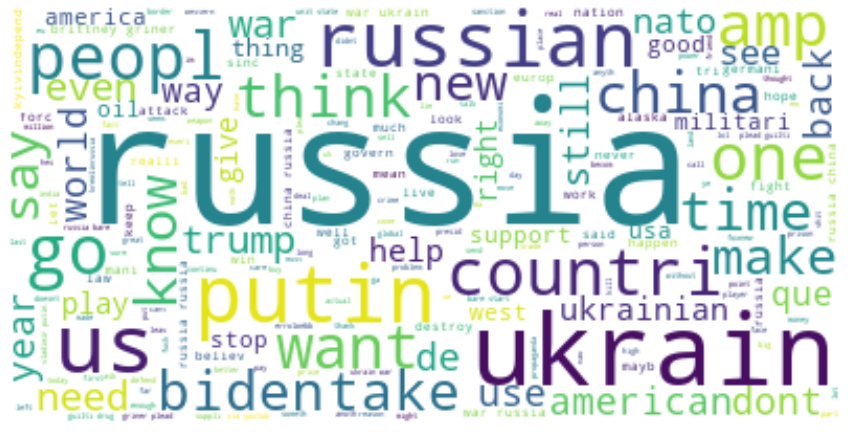

In [ ]:
text = " ".join(i for i in data.tweet)
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [ ]:
nltk.download('vader_lexicon')
sentiments = SentimentIntensityAnalyzer()
data["Positive"] = [sentiments.polarity_scores(i)["pos"] for i in data["tweet"]]
data["Negative"] = [sentiments.polarity_scores(i)["neg"] for i in data["tweet"]]
data["Neutral"] = [sentiments.polarity_scores(i)["neu"] for i in data["tweet"]]
data = data[["tweet", "Positive", "Negative", "Neutral"]]
print(data.head())

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


                                               tweet  Positive  Negative  \
0  jimjordan “russia listen ukrain need us favor ...     0.141     0.185   
1   russia appar use internationalspacest war ukrain     0.000     0.438   
2   don't care she special american detaine russi...     0.000     0.435   
3  ukrainerussia live news donetsk local brace mo...     0.000     0.326   
4  uh oh  gig grift  bori first go macron powerle...     0.000     0.132   

   Neutral  
0    0.675  
1    0.562  
2    0.565  
3    0.674  
4    0.868  


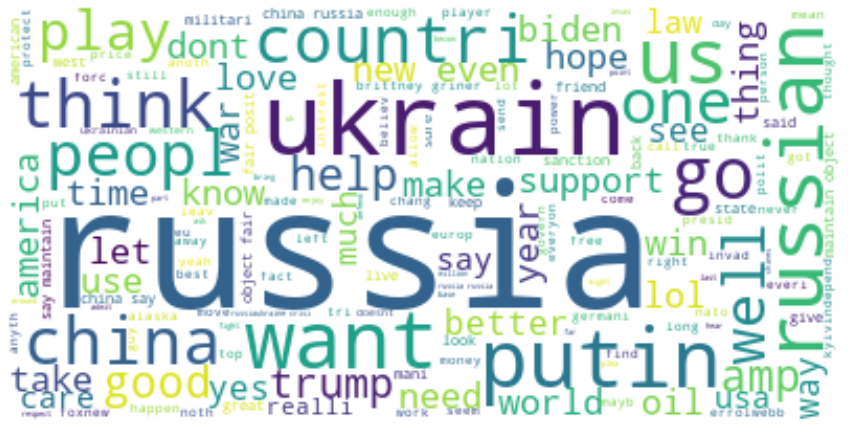

In [ ]:
positive =' '.join([i for i in data['tweet'][data['Positive'] > data["Negative"]]])
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(positive)
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

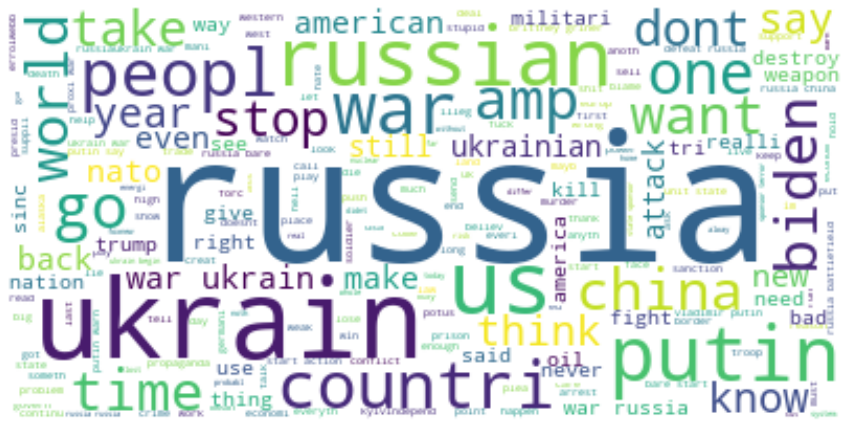

In [ ]:
negative =' '.join([i for i in data['tweet'][data['Negative'] > data["Positive"]]])
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(negative)
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()